In [1]:
from lagrangian_trajectory_clustering.data_loading import (
    load_cape_verde_trajectories,
    subset_trajectories,
)

In [2]:
df = subset_trajectories(load_cape_verde_trajectories(year=2010), num_traj=1_000)
df

time   latitude  longitude
traj obs                                          
0    0   1990-08-14 00:00:00  16.030224 -22.692162
     1   1990-08-15 00:00:00  16.007626 -22.691118
     2   1990-08-16 00:00:00  15.992856 -22.706793
     3   1990-08-17 00:00:00  15.983861 -22.728699
     4   1990-08-18 00:00:00  15.971163 -22.758718
...                      ...        ...        ...
999  282 1991-06-23 00:00:00  16.872139 -49.461440
     283 1991-06-24 00:00:00  16.851465 -49.568214
     284 1991-06-25 00:00:00  16.820005 -49.682370
     285 1991-06-26 00:00:00  16.744709 -49.795790
     286 1991-06-26 12:00:00  16.700317 -49.852192

[295385 rows x 3 columns]

In [3]:
from lagrangian_trajectory_clustering.trafo.grid import (
    geo_df_to_grid_series,
    grid_series_to_geo_df,
)

In [4]:
from lagrangian_trajectory_clustering.trafo.sequence import (
    remove_subsequent_identical_elements,
    series_sequences_to_multi_index_series,
    multi_index_series_to_series_sequences,
)

CPU times: user 390 ms, sys: 14.9 ms, total: 405 ms
Wall time: 391 ms


/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

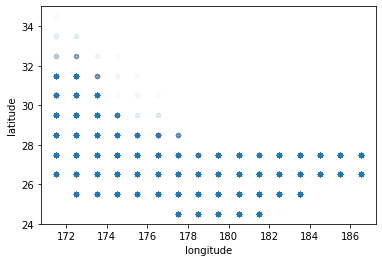

In [28]:
%%time

grid_series_to_geo_df(
    series_sequences_to_multi_index_series(
        remove_subsequent_identical_elements(
            multi_index_series_to_series_sequences(
                geo_df_to_grid_series(
                    df, lon_num=200, lat_num=200,
                )
            )
        ) 
    )
).plot.scatter(x="longitude", y="latitude", alpha=0.01)

In [49]:
x_axis_extent = df.longitude.min() - 10, df.longitude.max() + 10
y_axis_extent = df.latitude.min() - 10, df.latitude.max() + 10

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

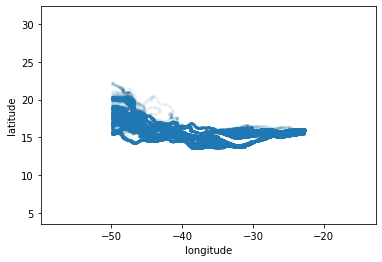

In [50]:
df.plot.scatter(x="longitude", y="latitude", s=5, alpha=0.01, xlim=x_axis_extent, ylim=y_axis_extent)

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/con

CPU times: user 3.59 s, sys: 837 ms, total: 4.43 s
Wall time: 3.32 s


/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


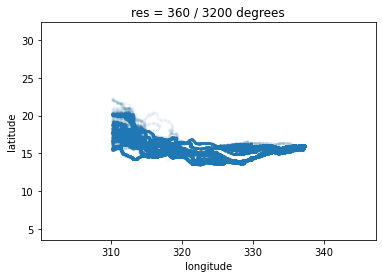

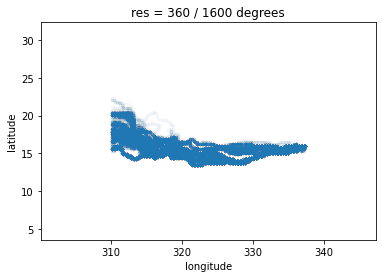

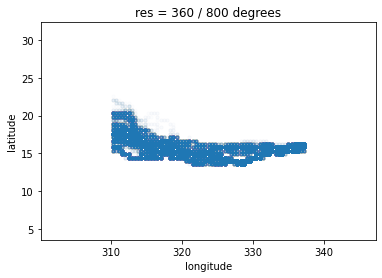

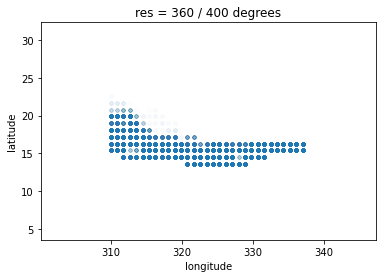

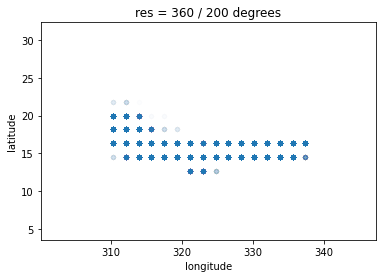

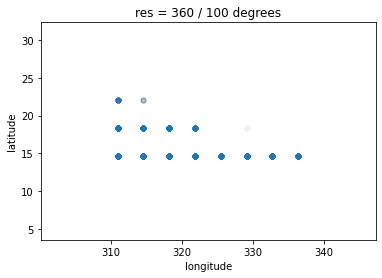

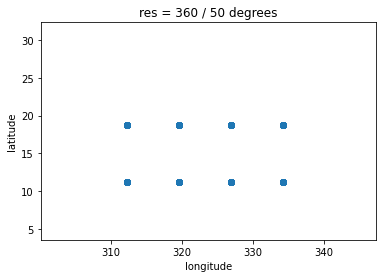

In [51]:
%%time

for n in [1_600, 800, 400, 200, 100, 50, 25]:
    ax = grid_series_to_geo_df(
        series_sequences_to_multi_index_series(
            remove_subsequent_identical_elements(
                multi_index_series_to_series_sequences(
                    geo_df_to_grid_series(
                        df, lon_num=2 * n, lat_num=n,
                    )
                )
            ) 
        ),
        lon_num=2 * n,
        lat_num=n,
    ).plot.scatter(
        x="longitude", y="latitude", s=5 / (n/1_600) **0.5, alpha=0.01, title=f"res = 360 / {2 * n} degrees",
        # xlim=x_axis_extent, ylim=y_axis_extent,
    )
    ax.set_xlim(x_axis_extent[0] + 360, x_axis_extent[1] + 360)
    ax.set_ylim(y_axis_extent[0], y_axis_extent[1])